In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.feature_selection import chi2, mutual_info_classif
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('medical_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
df.shape

(10000, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
df.duplicated().sum()

0

In [6]:
for col in ['CaseOrder', 'Customer_id', 'Interaction', 'UID']:
    print(col, df[col].nunique())

CaseOrder 10000
Customer_id 10000
Interaction 10000
UID 10000


In [7]:
df['City'].nunique()

6072

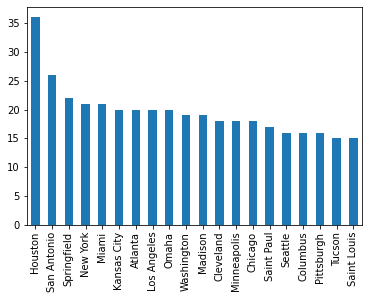

In [8]:
df['City'].value_counts()[:20].plot(kind='bar')
plt.show()

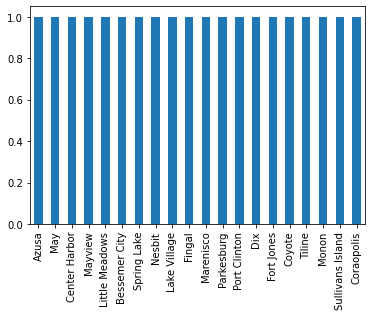

In [9]:
df['City'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [10]:
df['State'].nunique()

52

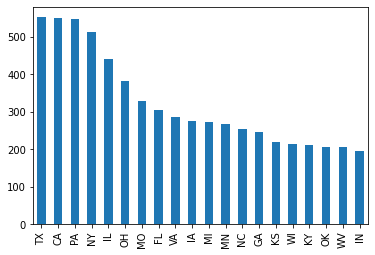

In [11]:
df['State'].value_counts()[:20].plot(kind='bar')
plt.show()

In [12]:
df['State'].unique()

array(['AL', 'FL', 'SD', 'MN', 'VA', 'OK', 'OH', 'MS', 'WI', 'IA', 'CA',
       'IN', 'MO', 'MI', 'NE', 'PA', 'AR', 'WV', 'KS', 'MA', 'KY', 'NY',
       'VT', 'DC', 'IL', 'ND', 'SC', 'AK', 'NM', 'NH', 'GA', 'NC', 'MD',
       'TN', 'WA', 'TX', 'CO', 'NJ', 'LA', 'OR', 'AZ', 'ME', 'ID', 'UT',
       'RI', 'MT', 'PR', 'NV', 'CT', 'HI', 'WY', 'DE'], dtype=object)

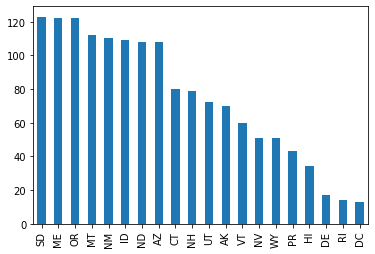

In [13]:
df['State'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [14]:
df['County'].nunique()

1607

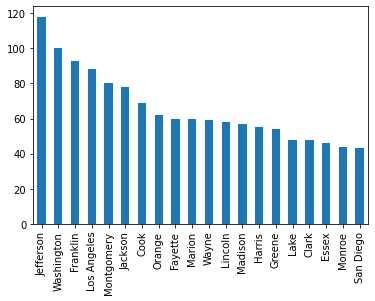

In [15]:
df['County'].value_counts()[:20].plot(kind='bar')
plt.show()

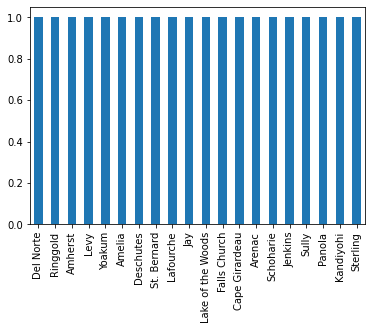

In [16]:
df['County'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [17]:
df['Zip'].nunique()

8612

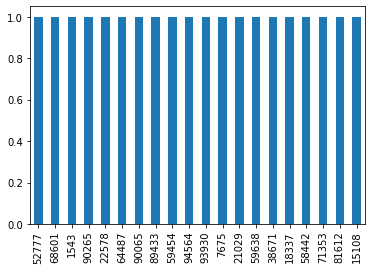

In [18]:
df['Zip'].value_counts()[-20:].plot(kind='bar')
plt.show()

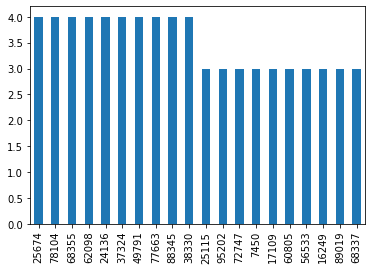

In [19]:
df['Zip'].value_counts()[:20].plot(kind='bar')
plt.show()

In [20]:
df['Lat'].describe()

count    10000.000000
mean        38.751099
std          5.403085
min         17.967190
25%         35.255120
50%         39.419355
75%         42.044175
max         70.560990
Name: Lat, dtype: float64

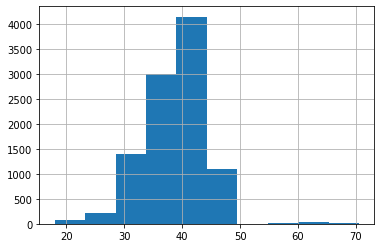

In [21]:
df['Lat'].hist()
plt.show()

In [22]:
df['Lng'].describe()

count    10000.000000
mean       -91.243080
std         15.205998
min       -174.209700
25%        -97.352982
50%        -88.397230
75%        -80.438050
max        -65.290170
Name: Lng, dtype: float64

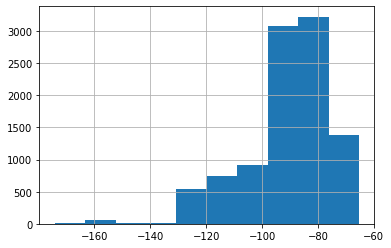

In [23]:
df['Lng'].hist()
plt.show()

In [24]:
#df.info()

In [25]:
df['Population'].describe()

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

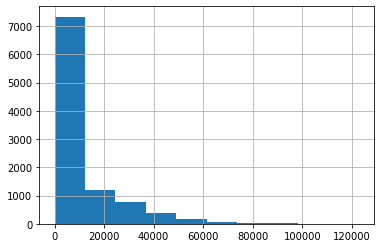

In [26]:
df['Population'].hist()
plt.show()

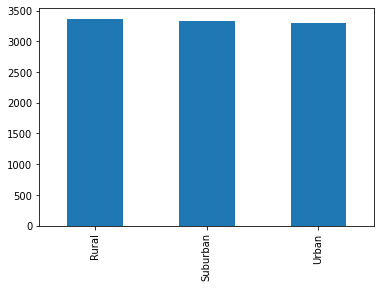

In [27]:
df['Area'].value_counts().plot(kind='bar')
plt.show()

In [28]:
df['Area'].value_counts()

Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64

In [29]:
df['TimeZone'].nunique()

26

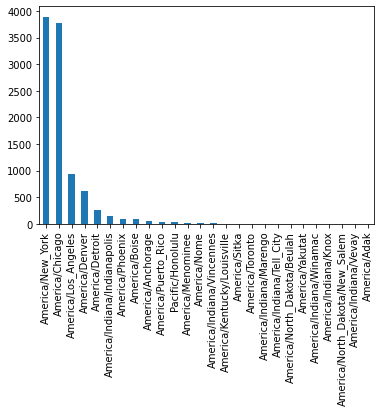

In [30]:
df['TimeZone'].value_counts().plot(kind='bar')
plt.show()

In [31]:
df['TimeZone'].value_counts()

America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak             

In [32]:
df['Job'].nunique()

639

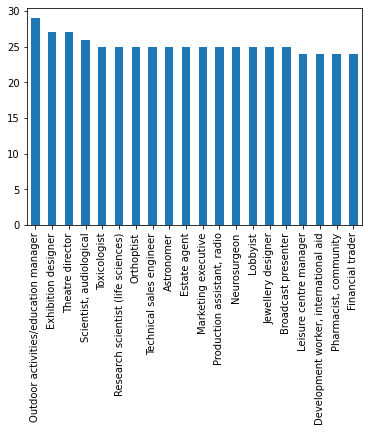

In [33]:
df['Job'].value_counts()[:20].plot(kind='bar')
plt.show()

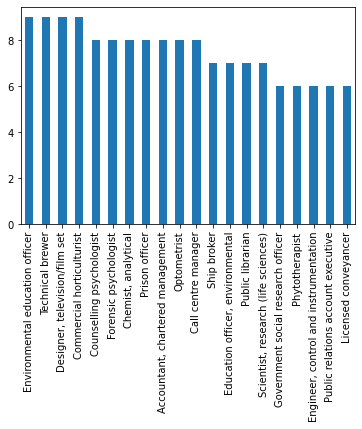

In [34]:
df['Job'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [35]:
df['Children'].describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

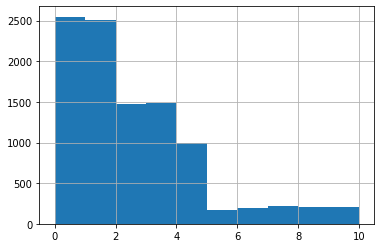

In [36]:
df['Children'].hist()
plt.show()

In [37]:
df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

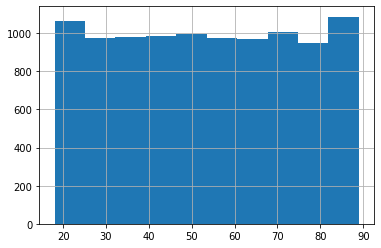

In [38]:
df['Age'].hist()
plt.show()

In [39]:
df['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

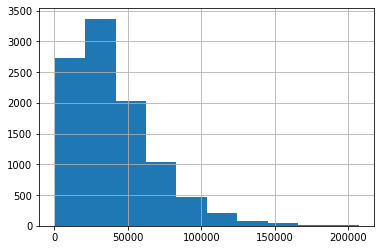

In [40]:
df['Income'].hist()
plt.show()

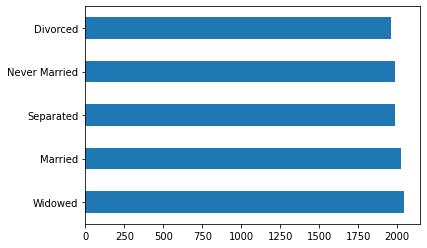

In [41]:
df['Marital'].value_counts().plot(kind='barh')
plt.show()

In [42]:
df['Marital'].value_counts()

Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

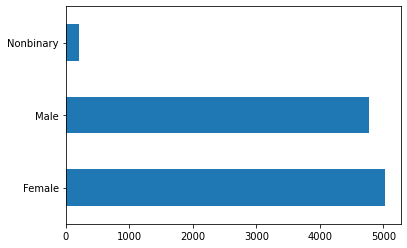

In [43]:
df['Gender'].value_counts().plot(kind='barh')
plt.show()

In [44]:
df['Gender'].value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [45]:
#df.info()

In [46]:
df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

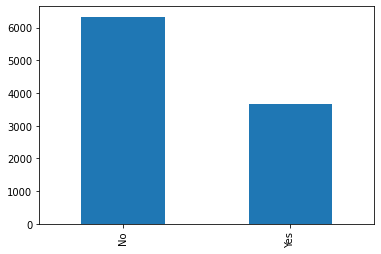

In [47]:
df['ReAdmis'].value_counts().plot(kind='bar')
plt.show()

In [48]:
df['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

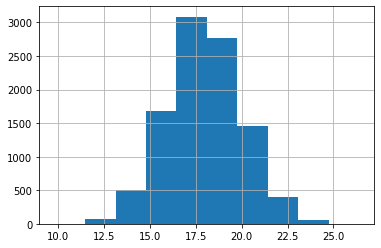

In [49]:
df['VitD_levels'].hist()
plt.show()

In [50]:
df['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

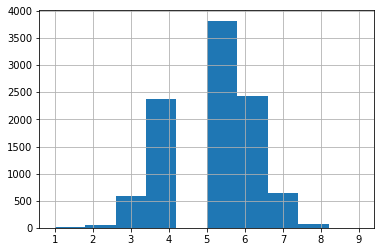

In [51]:
df['Doc_visits'].hist()
plt.show()

In [52]:
df['Full_meals_eaten'].describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

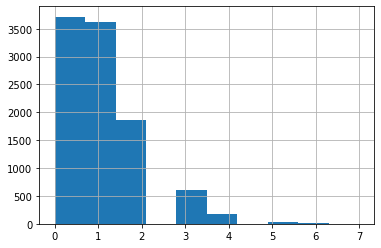

In [53]:
df['Full_meals_eaten'].hist()
plt.show()

In [54]:
df['vitD_supp'].describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

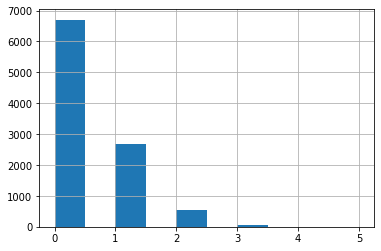

In [55]:
df['vitD_supp'].hist()
plt.show()

In [56]:
#df.info()

In [57]:
df['Soft_drink'].value_counts()

No     7425
Yes    2575
Name: Soft_drink, dtype: int64

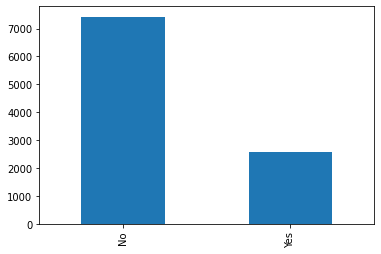

In [58]:
df['Soft_drink'].value_counts().plot(kind='bar')
plt.show()

In [59]:
df['Initial_admin'].value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

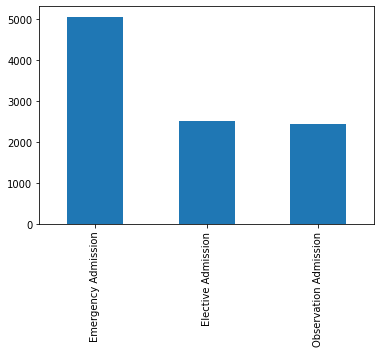

In [60]:
df['Initial_admin'].value_counts().plot(kind='bar')
plt.show()

In [61]:
df['HighBlood'].value_counts()

No     5910
Yes    4090
Name: HighBlood, dtype: int64

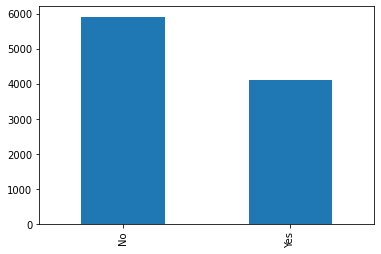

In [62]:
df['HighBlood'].value_counts().plot(kind='bar')
plt.show()

In [63]:
df['Stroke'].value_counts()

No     8007
Yes    1993
Name: Stroke, dtype: int64

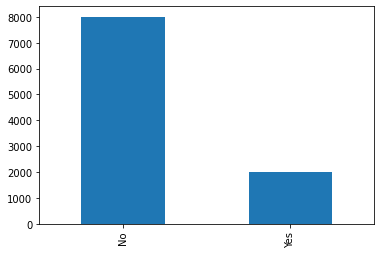

In [64]:
df['Stroke'].value_counts().plot(kind='bar')
plt.show()

In [65]:
df['Complication_risk'].value_counts()

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

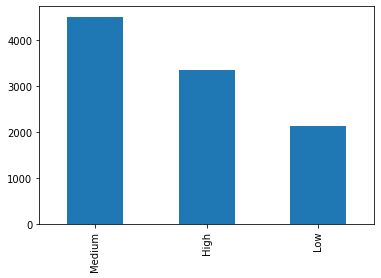

In [66]:
df['Complication_risk'].value_counts().plot(kind='bar')
plt.show()

In [67]:
#df.info()

In [68]:
df['Overweight'].value_counts()

Yes    7094
No     2906
Name: Overweight, dtype: int64

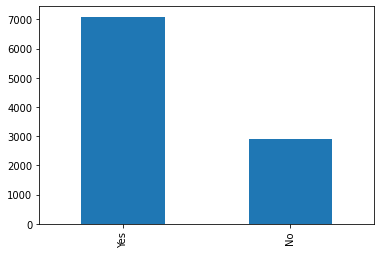

In [69]:
df['Overweight'].value_counts().plot(kind='bar')
plt.show()

In [70]:
df['Arthritis'].value_counts()

No     6426
Yes    3574
Name: Arthritis, dtype: int64

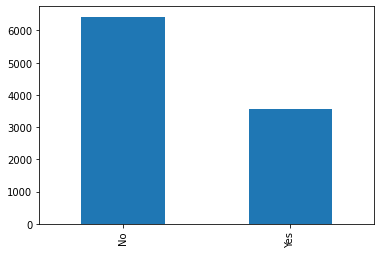

In [71]:
df['Arthritis'].value_counts().plot(kind='bar')
plt.show()

In [72]:
df['Diabetes'].value_counts()

No     7262
Yes    2738
Name: Diabetes, dtype: int64

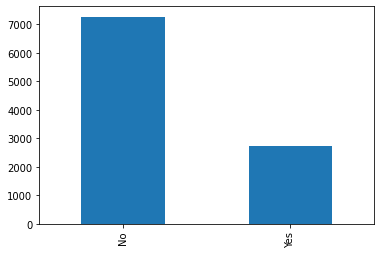

In [73]:
df['Diabetes'].value_counts().plot(kind='bar')
plt.show()

In [74]:
df['Hyperlipidemia'].value_counts()

No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64

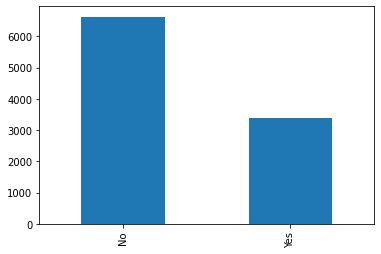

In [75]:
df['Hyperlipidemia'].value_counts().plot(kind='bar')
plt.show()

In [76]:
df['BackPain'].value_counts()

No     5886
Yes    4114
Name: BackPain, dtype: int64

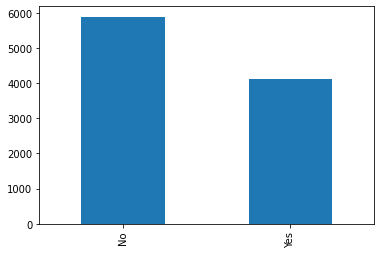

In [77]:
df['BackPain'].value_counts().plot(kind='bar')
plt.show()

In [78]:
df['Anxiety'].value_counts()

No     6785
Yes    3215
Name: Anxiety, dtype: int64

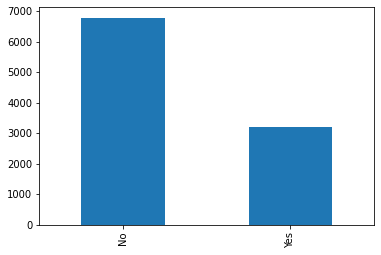

In [79]:
df['Anxiety'].value_counts().plot(kind='bar')
plt.show()

In [80]:
#df.info()

In [81]:
df['Allergic_rhinitis'].value_counts()

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64

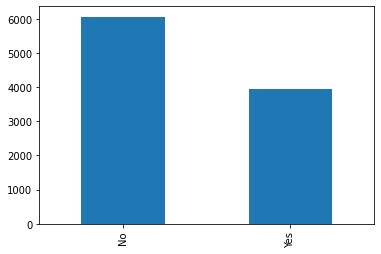

In [82]:
df['Allergic_rhinitis'].value_counts().plot(kind='bar')
plt.show()

In [83]:
df['Reflux_esophagitis'].value_counts()

No     5865
Yes    4135
Name: Reflux_esophagitis, dtype: int64

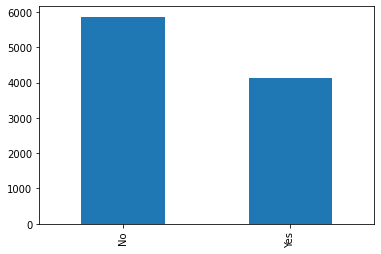

In [84]:
df['Reflux_esophagitis'].value_counts().plot(kind='bar')
plt.show()

In [85]:
df['Asthma'].value_counts()

No     7107
Yes    2893
Name: Asthma, dtype: int64

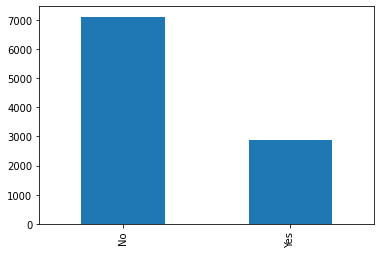

In [86]:
df['Asthma'].value_counts().plot(kind='bar')
plt.show()

In [87]:
df['Services'].value_counts()

Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: Services, dtype: int64

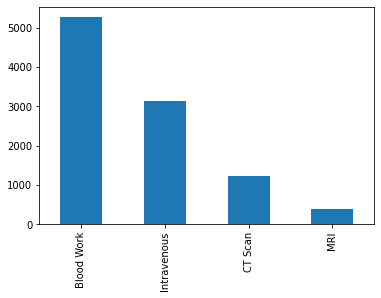

In [88]:
df['Services'].value_counts().plot(kind='bar')
plt.show()

In [89]:
df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

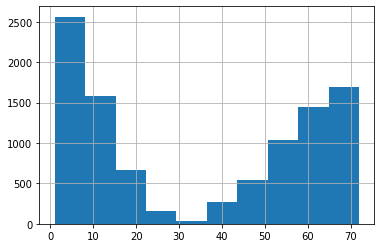

In [90]:
df['Initial_days'].hist()
plt.show()

In [91]:
df['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

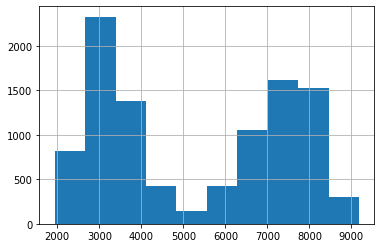

In [92]:
df['TotalCharge'].hist()
plt.show()

In [93]:
df['Additional_charges'].describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

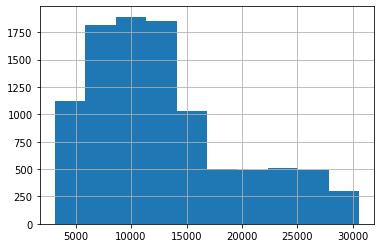

In [94]:
df['Additional_charges'].hist()
plt.show()

In [95]:
df['Item1'].describe()

count    10000.000000
mean         3.518800
std          1.031966
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: Item1, dtype: float64

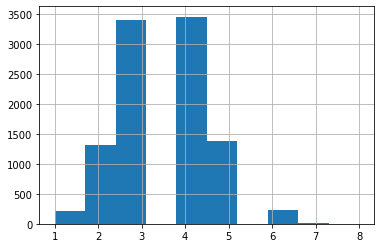

In [96]:
df['Item1'].hist()
plt.show()

In [97]:
df['Item2'].describe()

count    10000.000000
mean         3.506700
std          1.034825
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item2, dtype: float64

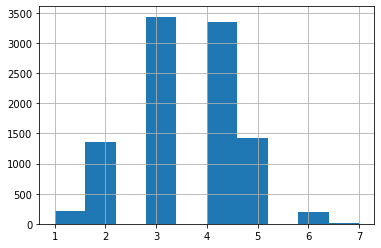

In [98]:
df['Item2'].hist()
plt.show()

In [99]:
df['Item3'].describe()

count    10000.000000
mean         3.511100
std          1.032755
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: Item3, dtype: float64

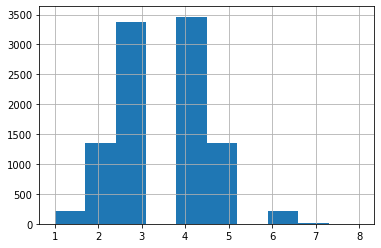

In [100]:
df['Item3'].hist()
plt.show()

In [101]:
df['Item4'].describe()

count    10000.000000
mean         3.515100
std          1.036282
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item4, dtype: float64

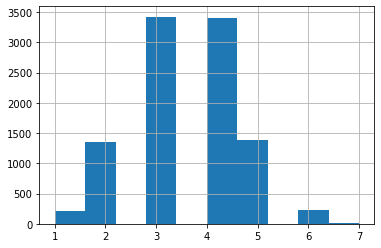

In [102]:
df['Item4'].hist()
plt.show()

In [103]:
df['Item5'].describe()

count    10000.000000
mean         3.496900
std          1.030192
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item5, dtype: float64

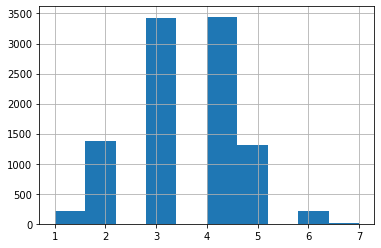

In [104]:
df['Item5'].hist()
plt.show()

In [105]:
df['Item6'].describe()

count    10000.000000
mean         3.522500
std          1.032376
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item6, dtype: float64

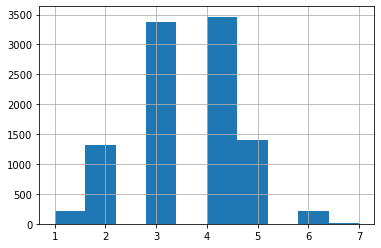

In [106]:
df['Item6'].hist()
plt.show()

In [107]:
df['Item7'].describe()

count    10000.000000
mean         3.494000
std          1.021405
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item7, dtype: float64

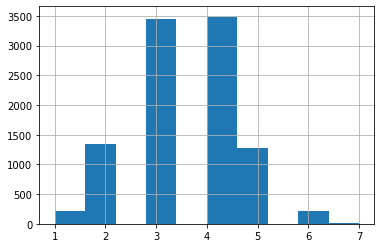

In [108]:
df['Item7'].hist()
plt.show()

In [109]:
df['Item8'].describe()

count    10000.000000
mean         3.509700
std          1.042312
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item8, dtype: float64

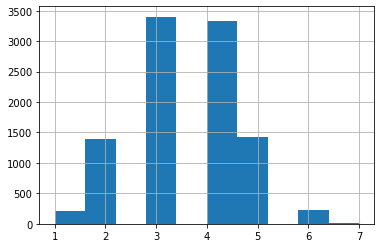

In [110]:
df['Item8'].hist()
plt.show()

In [111]:
med_df = df.copy()
med_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [112]:
#med_df.columns

In [113]:
med_df = med_df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'County', 'Zip',
                             'Lat', 'Lng', 'TimeZone', 'Job'], axis=1)
med_df.shape

(10000, 39)

In [114]:
#med_df.info()

In [115]:
numeric_cols = [col for col in med_df.columns if med_df[col].dtype in ['int64', 'float64']]
print(numeric_cols)

['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


In [116]:
categorical_cols = [col for col in med_df.columns if col not in numeric_cols]
print(categorical_cols)

['State', 'Area', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services']


In [117]:
complication_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
med_df['Complication_Ordinal'] = med_df['Complication_risk'].map(complication_mapping)
#med_df.info()

In [118]:
numeric_cols.append('Complication_Ordinal')
categorical_cols.remove('Complication_risk')

In [119]:
region_mapping = {'AK': 'Alaska', 'MI': 'Great_Lakes', 'OR': 'West_Coast', 'CA': 'West_Coast', 
                 'TX': 'Southwest', 'GA': 'Southeast', 'TN': 'Southeast', 'OK': 'Southwest', 'FL': 'Southeast',
                 'OH': 'ORV', 'IA': 'Midwest', 'IL': 'Great_Lakes', 'WI': 'Great_Lakes', 'NC': 'Southeast',
                 'AL': 'Southeast', 'NM': 'Southwest', 'VT': 'Northeast', 'MD': 'Northeast', 'NY': 'Northeast',
                 'WA': 'West_Coast', 'CT': 'Northeast', 'NJ': 'Northeast', 'DC': 'Northeast', 'ND': 'Midwest',
                 'LA': 'Southeast', 'NE': 'Midwest', 'WV': 'ORV', 'AZ': 'Southwest', 'MO': 'Midwest', 
                 'WY': 'Midwest', 'MT': 'Midwest', 'VA': 'Southeast', 'KY': 'ORV', 'MN': 'Great_Lakes',
                 'KS': 'Midwest', 'MA': 'Northeast', 'IN': 'Midwest', 'SC': 'Southeast', 'NH': 'Northeast',
                 'DE': 'Northeast', 'MS': 'Southeast', 'ID': 'Western', 'AR': 'Southeast', 'SD': 'Midwest',
                 'CO': 'Midwest', 'HI': 'Hawaii', 'UT': 'Western', 'RI': 'Northeast', 'NV': 'Western', 
                  'PA': 'Northeast', 'PR': 'Puerto_Rico', 'ME': 'Northeast'}

med_df['Region'] = med_df['State'].map(region_mapping)
#med_df.info()

In [120]:
categorical_cols.remove('State')
categorical_cols.append('Region')

In [121]:
med_df = med_df.drop(columns=['State', 'Complication_risk'], axis=1)
#med_df.shape

In [122]:
#assert len(categorical_cols) + len(numeric_cols) == 39

In [123]:
oh_enc_cols = [col for col in categorical_cols if med_df[col].nunique() > 2]
print(oh_enc_cols)

['Area', 'Marital', 'Gender', 'Initial_admin', 'Services', 'Region']


In [124]:
le_cols = [col for col in categorical_cols if col not in oh_enc_cols]
print(le_cols)

['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']


In [125]:
#assert len(oh_enc_cols) + len(le_cols) == 19

In [126]:
outlier_id_df = med_df[numeric_cols]
#outlier_id_df

In [127]:
for col in outlier_id_df.columns:
    print(col, stats.shapiro(outlier_id_df[col]))

Population ShapiroResult(statistic=0.6959056258201599, pvalue=0.0)
Children ShapiroResult(statistic=0.8344841599464417, pvalue=0.0)
Age ShapiroResult(statistic=0.9558436274528503, pvalue=0.0)
Income ShapiroResult(statistic=0.8972555994987488, pvalue=0.0)
VitD_levels ShapiroResult(statistic=0.999812126159668, pvalue=0.5707642436027527)
Doc_visits ShapiroResult(statistic=0.9237838983535767, pvalue=0.0)
Full_meals_eaten ShapiroResult(statistic=0.8325154781341553, pvalue=0.0)
vitD_supp ShapiroResult(statistic=0.646554708480835, pvalue=0.0)
Initial_days ShapiroResult(statistic=0.834560215473175, pvalue=0.0)
TotalCharge ShapiroResult(statistic=0.8700437545776367, pvalue=0.0)
Additional_charges ShapiroResult(statistic=0.9231877326965332, pvalue=0.0)
Item1 ShapiroResult(statistic=0.9210176467895508, pvalue=0.0)
Item2 ShapiroResult(statistic=0.9212497472763062, pvalue=0.0)
Item3 ShapiroResult(statistic=0.9210538268089294, pvalue=0.0)
Item4 ShapiroResult(statistic=0.9216099977493286, pvalue=0.0)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [128]:
for col in outlier_id_df.columns:
    outlier_id_df[f'{col}_IQR'] = stats.iqr(outlier_id_df[col])
    outlier_id_df[f'{col}_lower'] = np.percentile(outlier_id_df[col], 25) - (1.5 * outlier_id_df[f'{col}_IQR'])
    outlier_id_df[f'{col}_upper'] = np.percentile(outlier_id_df[col], 75) + (1.5 * outlier_id_df[f'{col}_IQR'])

<ipython-input-128-28de8e82c456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id_df[f'{col}_IQR'] = stats.iqr(outlier_id_df[col])
<ipython-input-128-28de8e82c456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id_df[f'{col}_lower'] = np.percentile(outlier_id_df[col], 25) - (1.5 * outlier_id_df[f'{col}_IQR'])
<ipython-input-128-28de8e82c456>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [129]:
for col in outlier_id_df.columns:
    if outlier_id_df[col].nunique() >= 2:
        outlier_id_df[f'{col}_outlier'] = [0 if outlier_id_df[col][i] > outlier_id_df[f'{col}_lower'][i] and outlier_id_df[col][i] < outlier_id_df[f'{col}_upper'][i] else 1 for i in range(len(outlier_id_df))] 
        
        

In [130]:
#outlier_id_df.columns

In [131]:
for col in outlier_id_df.columns[:20]:
    print(col, np.sum(outlier_id_df[f'{col}_outlier']))

Population 855
Children 411
Age 0
Income 326
VitD_levels 60
Doc_visits 8
Full_meals_eaten 33
vitD_supp 70
Initial_days 0
TotalCharge 0
Additional_charges 424
Item1 449
Item2 429
Item3 443
Item4 450
Item5 443
Item6 443
Item7 438
Item8 442
Complication_Ordinal 0


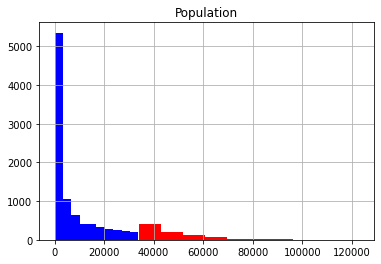

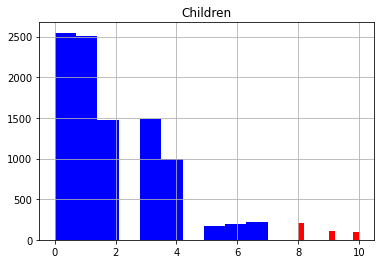

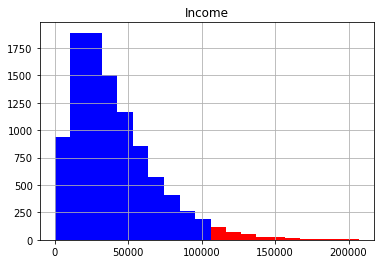

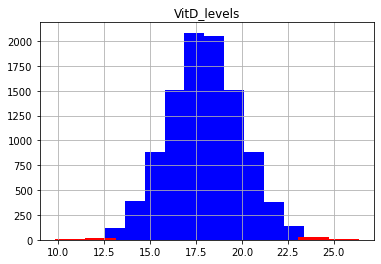

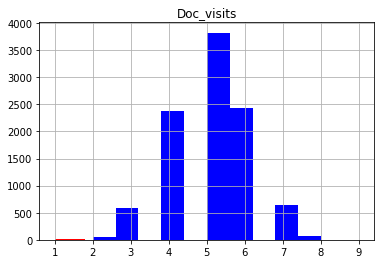

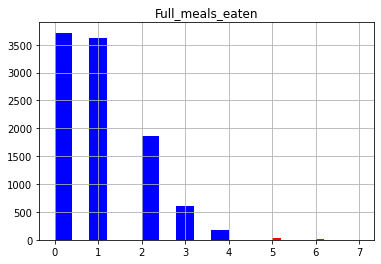

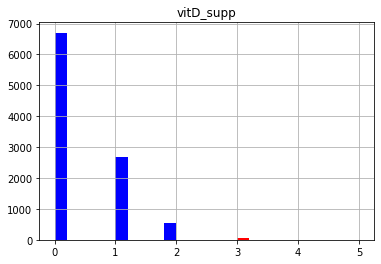

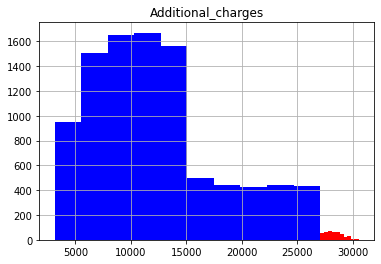

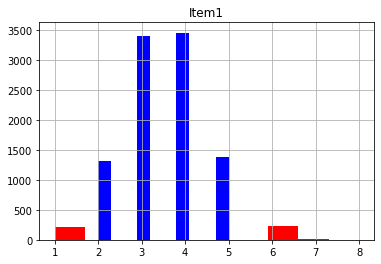

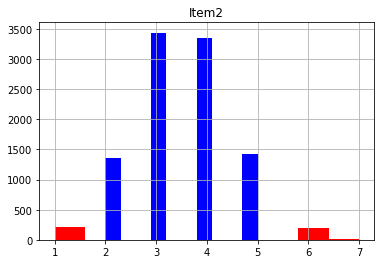

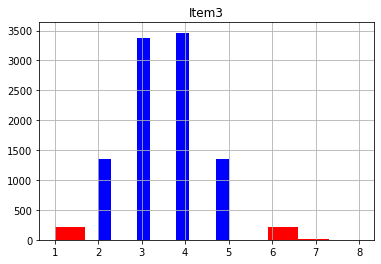

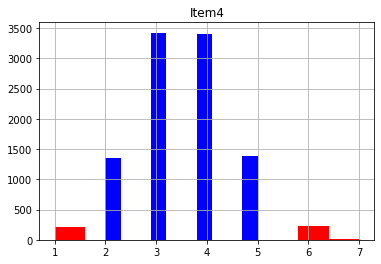

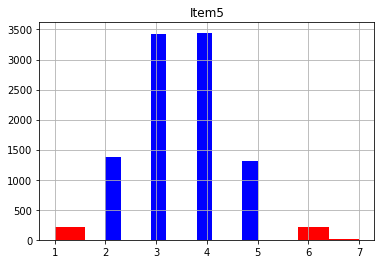

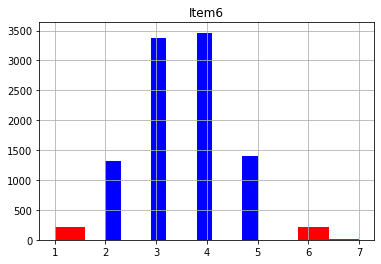

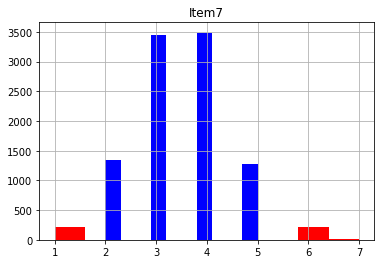

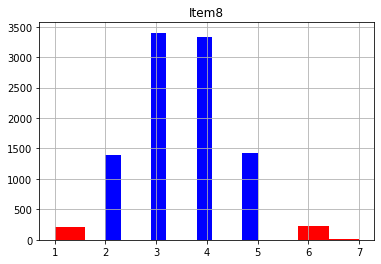

In [132]:
for col in outlier_id_df.columns[:20]:
    if np.sum(outlier_id_df[f'{col}_outlier']) > 0:
        fig, ax = plt.subplots()
        col_no_outlier = outlier_id_df.loc[outlier_id_df[f'{col}_outlier']==0, f'{col}']
        col_outlier = outlier_id_df.loc[outlier_id_df[f'{col}_outlier']==1, f'{col}']
        col_no_outlier.hist(color='blue')
        col_outlier.hist(color='red')
        plt.title(f'{col}')

In [133]:
numeric_df = med_df[numeric_cols]

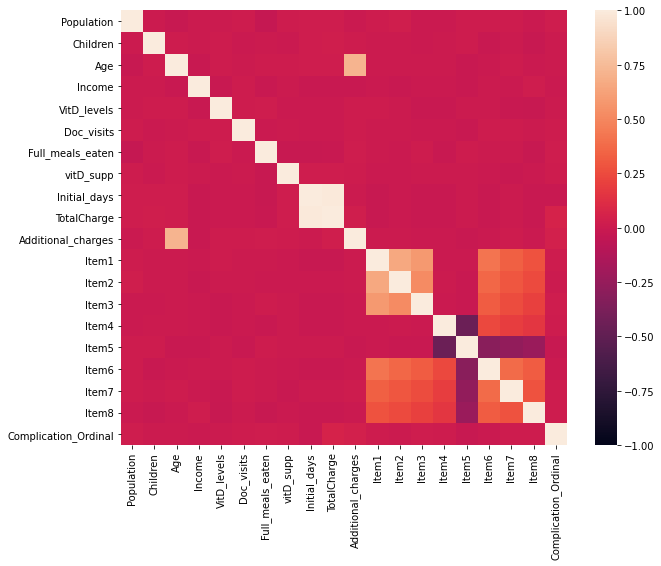

In [134]:
corr_mat = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, vmin=-1, vmax=1)
plt.show()

In [135]:
for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if abs(numeric_df[col1].corr(numeric_df[col2])) > 0.3 and abs(numeric_df[col1].corr(numeric_df[col2])) < 1:
            print(f'{col1} vs. {col2}: {numeric_df[col1].corr(numeric_df[col2])}')

Population vs. Population: 0.9999999999999999
Children vs. Children: 0.9999999999999998
Age vs. Additional_charges: 0.7168536181504478
Income vs. Income: 0.9999999999999999
Initial_days vs. TotalCharge: 0.9876402655398174
TotalCharge vs. Initial_days: 0.9876402655398173
TotalCharge vs. TotalCharge: 0.9999999999999998
Additional_charges vs. Age: 0.7168536181504478
Item1 vs. Item1: 0.9999999999999998
Item1 vs. Item2: 0.6555779844563837
Item1 vs. Item3: 0.5795849800811697
Item1 vs. Item6: 0.42123308662109143
Item1 vs. Item7: 0.33285540945050807
Item2 vs. Item1: 0.6555779844563836
Item2 vs. Item3: 0.5217278921088611
Item2 vs. Item6: 0.36607508346269657
Item3 vs. Item1: 0.5795849800811698
Item3 vs. Item2: 0.5217278921088612
Item3 vs. Item6: 0.31287391532331305
Item4 vs. Item5: -0.4473722695475056
Item5 vs. Item4: -0.4473722695475056
Item5 vs. Item5: 0.9999999999999998
Item5 vs. Item6: -0.31015416697386056
Item6 vs. Item1: 0.42123308662109143
Item6 vs. Item2: 0.36607508346269657
Item6 vs. It

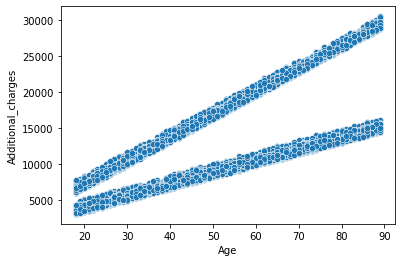

In [136]:
sns.scatterplot(x='Age', y='Additional_charges', data=numeric_df)
plt.show()

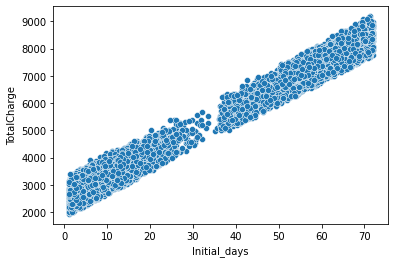

In [137]:
sns.scatterplot(x='Initial_days', y='TotalCharge', data=numeric_df)
plt.show()

In [138]:
df_le = med_df[le_cols]
df_le.head()

,ReAdmis,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
0,No,No,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes
1,No,No,Yes,No,Yes,No,No,No,No,No,No,Yes,No
2,No,No,Yes,No,Yes,No,Yes,No,No,No,No,No,No
3,No,No,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes
4,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No,No


In [139]:
for col in df_le.columns:
    le = LabelEncoder()
    df_le[f'LE_{col}'] = le.fit_transform(df_le[col])
    
#df_le.head()

<ipython-input-139-e7a82e3edd67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le[f'LE_{col}'] = le.fit_transform(df_le[col])
<ipython-input-139-e7a82e3edd67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le[f'LE_{col}'] = le.fit_transform(df_le[col])
<ipython-input-139-e7a82e3edd67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [140]:
#df_le[['ReAdmis', 'LE_ReAdmis']].head()

In [141]:
final_le_cols = [col for col in df_le.columns if col.startswith('LE_')]
print(final_le_cols)

['LE_ReAdmis', 'LE_Soft_drink', 'LE_HighBlood', 'LE_Stroke', 'LE_Overweight', 'LE_Arthritis', 'LE_Diabetes', 'LE_Hyperlipidemia', 'LE_BackPain', 'LE_Anxiety', 'LE_Allergic_rhinitis', 'LE_Reflux_esophagitis', 'LE_Asthma']


In [142]:
df_le_final = df_le[final_le_cols]

In [143]:
#df_le_final.head()

In [144]:
df_oh = med_df[oh_enc_cols]
#df_oh.head()

In [145]:
df_oh_final = pd.get_dummies(df_oh, drop_first=True)

In [146]:
df_final = pd.concat([numeric_df, df_le_final, df_oh_final], axis=1)
df_final.head()

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,...,Region_Great_Lakes,Region_Hawaii,Region_Midwest,Region_Northeast,Region_ORV,Region_Puerto_Rico,Region_Southeast,Region_Southwest,Region_West_Coast,Region_Western
0,2951,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,...,0,0,0,0,0,0,1,0,0,0
1,11303,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,...,0,0,0,0,0,0,1,0,0,0
2,17125,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,...,0,0,1,0,0,0,0,0,0,0
3,2162,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,...,1,0,0,0,0,0,0,0,0,0
4,5287,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,...,0,0,0,0,0,0,1,0,0,0


In [147]:
oh_enc_cols_final = [col for col in df_final.columns if col in df_oh_final.columns]
print(oh_enc_cols_final)

['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI', 'Region_Great_Lakes', 'Region_Hawaii', 'Region_Midwest', 'Region_Northeast', 'Region_ORV', 'Region_Puerto_Rico', 'Region_Southeast', 'Region_Southwest', 'Region_West_Coast', 'Region_Western']


In [148]:
binary_cols_final = [col for col in df_final.columns if col in df_le_final.columns]
print(binary_cols_final)

['LE_ReAdmis', 'LE_Soft_drink', 'LE_HighBlood', 'LE_Stroke', 'LE_Overweight', 'LE_Arthritis', 'LE_Diabetes', 'LE_Hyperlipidemia', 'LE_BackPain', 'LE_Anxiety', 'LE_Allergic_rhinitis', 'LE_Reflux_esophagitis', 'LE_Asthma']


In [149]:
numeric_cols_final = [col for col in df_final.columns if col in numeric_df.columns]
print(numeric_cols_final)

['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Complication_Ordinal']


In [150]:
categorical_cols_final = oh_enc_cols_final + binary_cols_final
print(categorical_cols_final)

['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI', 'Region_Great_Lakes', 'Region_Hawaii', 'Region_Midwest', 'Region_Northeast', 'Region_ORV', 'Region_Puerto_Rico', 'Region_Southeast', 'Region_Southwest', 'Region_West_Coast', 'Region_Western', 'LE_ReAdmis', 'LE_Soft_drink', 'LE_HighBlood', 'LE_Stroke', 'LE_Overweight', 'LE_Arthritis', 'LE_Diabetes', 'LE_Hyperlipidemia', 'LE_BackPain', 'LE_Anxiety', 'LE_Allergic_rhinitis', 'LE_Reflux_esophagitis', 'LE_Asthma']


In [151]:
for col in numeric_cols_final:
    print(f'{col} vs. ReAdmis: ', stats.pointbiserialr(df_final[col], df_final['LE_ReAdmis']))

Population vs. ReAdmis:  PointbiserialrResult(correlation=0.020039741541269387, pvalue=0.045078110303701575)
Children vs. ReAdmis:  PointbiserialrResult(correlation=0.023531521723447406, pvalue=0.018613429760397364)
Age vs. ReAdmis:  PointbiserialrResult(correlation=0.01581042346292704, pvalue=0.11389095473248521)
Income vs. ReAdmis:  PointbiserialrResult(correlation=-0.011503849976310859, pvalue=0.25002887450211925)
VitD_levels vs. ReAdmis:  PointbiserialrResult(correlation=0.0040825877907188215, pvalue=0.6831199147428849)
Doc_visits vs. ReAdmis:  PointbiserialrResult(correlation=0.0002456863861360274, pvalue=0.9804014839847275)
Full_meals_eaten vs. ReAdmis:  PointbiserialrResult(correlation=-0.012171865997468868, pvalue=0.22357396050217573)
vitD_supp vs. ReAdmis:  PointbiserialrResult(correlation=0.011038653915144827, pvalue=0.26969681554002234)
Initial_days vs. ReAdmis:  PointbiserialrResult(correlation=0.8508616016470898, pvalue=0.0)
TotalCharge vs. ReAdmis:  PointbiserialrResult(c

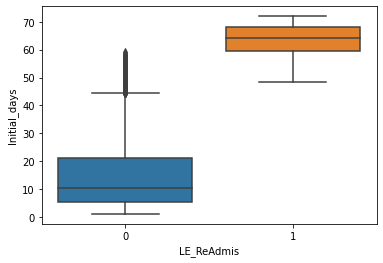

In [152]:
sns.boxplot(x='LE_ReAdmis', y='Initial_days', data=df_final)
plt.show()

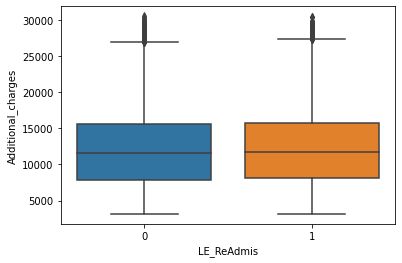

In [153]:
sns.boxplot(x='LE_ReAdmis', y='Additional_charges', data=df_final)
plt.show()

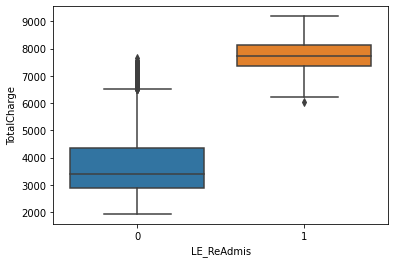

In [154]:
sns.boxplot(x='LE_ReAdmis', y='TotalCharge', data=df_final)
plt.show()

In [155]:
for col1 in numeric_cols_final:
    for col2 in categorical_cols_final:
        print(f'{col1} vs. {col2}: ', stats.pointbiserialr(df_final[col1], df_final[col2]))
                     

Population vs. Area_Suburban:  PointbiserialrResult(correlation=0.017117259028285443, pvalue=0.08696352732846839)
Population vs. Area_Urban:  PointbiserialrResult(correlation=0.006029859738535457, pvalue=0.546564520364932)
Population vs. Marital_Married:  PointbiserialrResult(correlation=0.0041413180752712525, pvalue=0.6788141912721264)
Population vs. Marital_Never Married:  PointbiserialrResult(correlation=0.004599885769389029, pvalue=0.6455639478843712)
Population vs. Marital_Separated:  PointbiserialrResult(correlation=-0.002695088501943893, pvalue=0.7875636786568243)
Population vs. Marital_Widowed:  PointbiserialrResult(correlation=-0.01392296611026663, pvalue=0.16386485895239755)
Population vs. Gender_Male:  PointbiserialrResult(correlation=0.003283604055379156, pvalue=0.7426695399340162)
Population vs. Gender_Nonbinary:  PointbiserialrResult(correlation=0.012224085697190263, pvalue=0.22159366102740358)
Population vs. Initial_admin_Emergency Admission:  PointbiserialrResult(correl

Age vs. Services_Intravenous:  PointbiserialrResult(correlation=0.004141931223089959, pvalue=0.6787692941869209)
Age vs. Services_MRI:  PointbiserialrResult(correlation=0.008529394563708366, pvalue=0.39374341037195093)
Age vs. Region_Great_Lakes:  PointbiserialrResult(correlation=-0.002433922033394578, pvalue=0.807724871727348)
Age vs. Region_Hawaii:  PointbiserialrResult(correlation=0.0014652436032012882, pvalue=0.8835218571316472)
Age vs. Region_Midwest:  PointbiserialrResult(correlation=-0.017648748256879905, pvalue=0.07759879005313959)
Age vs. Region_Northeast:  PointbiserialrResult(correlation=0.007009760540471676, pvalue=0.4833672736165796)
Age vs. Region_ORV:  PointbiserialrResult(correlation=0.002172602560692994, pvalue=0.8280264930593353)
Age vs. Region_Puerto_Rico:  PointbiserialrResult(correlation=-0.0025920943781379295, pvalue=0.7954983135640671)
Age vs. Region_Southeast:  PointbiserialrResult(correlation=0.006880544906671487, pvalue=0.4914675035681647)
Age vs. Region_South

Doc_visits vs. Marital_Married:  PointbiserialrResult(correlation=-0.0011142537286558552, pvalue=0.911290058227048)
Doc_visits vs. Marital_Never Married:  PointbiserialrResult(correlation=-0.010600346144886712, pvalue=0.28917559127645104)
Doc_visits vs. Marital_Separated:  PointbiserialrResult(correlation=-0.0010165132227655748, pvalue=0.9190435068695325)
Doc_visits vs. Marital_Widowed:  PointbiserialrResult(correlation=-0.001410514405505135, pvalue=0.8878431788452029)
Doc_visits vs. Gender_Male:  PointbiserialrResult(correlation=-0.006159478945282459, pvalue=0.5379758753608804)
Doc_visits vs. Gender_Nonbinary:  PointbiserialrResult(correlation=-0.0004036359511833008, pvalue=0.9678072748043511)
Doc_visits vs. Initial_admin_Emergency Admission:  PointbiserialrResult(correlation=0.003685515227648337, pvalue=0.7124954483383918)
Doc_visits vs. Initial_admin_Observation Admission:  PointbiserialrResult(correlation=0.01565750645789024, pvalue=0.11743037129653616)
Doc_visits vs. Services_CT S

TotalCharge vs. Marital_Never Married:  PointbiserialrResult(correlation=0.00716426350912106, pvalue=0.4737777391094274)
TotalCharge vs. Marital_Separated:  PointbiserialrResult(correlation=0.008015310827485201, pvalue=0.4228747912510254)
TotalCharge vs. Marital_Widowed:  PointbiserialrResult(correlation=0.006807157025404766, pvalue=0.49610026391039863)
TotalCharge vs. Gender_Male:  PointbiserialrResult(correlation=0.004748101140346236, pvalue=0.6349627263009661)
TotalCharge vs. Gender_Nonbinary:  PointbiserialrResult(correlation=0.005889702535875724, pvalue=0.5559271936759801)
TotalCharge vs. Initial_admin_Emergency Admission:  PointbiserialrResult(correlation=0.10698481999573395, pvalue=7.52507504284962e-27)
TotalCharge vs. Initial_admin_Observation Admission:  PointbiserialrResult(correlation=-0.06686956817441121, pvalue=2.1772611199175464e-11)
TotalCharge vs. Services_CT Scan:  PointbiserialrResult(correlation=0.01056116024713583, pvalue=0.29096206990708084)
TotalCharge vs. Service

Item3 vs. Region_Hawaii:  PointbiserialrResult(correlation=0.012680241545337994, pvalue=0.20482773113093614)
Item3 vs. Region_Midwest:  PointbiserialrResult(correlation=-0.003096732178847152, pvalue=0.7568383480393572)
Item3 vs. Region_Northeast:  PointbiserialrResult(correlation=0.02513925123769643, pvalue=0.011936767753001364)
Item3 vs. Region_ORV:  PointbiserialrResult(correlation=-0.00031410009002067005, pvalue=0.9749456897800584)
Item3 vs. Region_Puerto_Rico:  PointbiserialrResult(correlation=-0.0014462844382540432, pvalue=0.8850184540782942)
Item3 vs. Region_Southeast:  PointbiserialrResult(correlation=-0.015407633831309327, pvalue=0.1233990161902643)
Item3 vs. Region_Southwest:  PointbiserialrResult(correlation=-0.0012569498663053454, pvalue=0.8999857695372326)
Item3 vs. Region_West_Coast:  PointbiserialrResult(correlation=0.0020416915983636932, pvalue=0.838241088471252)
Item3 vs. Region_Western:  PointbiserialrResult(correlation=-0.0035862282678354044, pvalue=0.7199099473033077

Item7 vs. LE_Soft_drink:  PointbiserialrResult(correlation=0.012304233255142618, pvalue=0.21857876442010415)
Item7 vs. LE_HighBlood:  PointbiserialrResult(correlation=0.007276739922138047, pvalue=0.46686297531116855)
Item7 vs. LE_Stroke:  PointbiserialrResult(correlation=-0.005279844869826087, pvalue=0.5975533603810528)
Item7 vs. LE_Overweight:  PointbiserialrResult(correlation=-0.009150919780103819, pvalue=0.3601933410961753)
Item7 vs. LE_Arthritis:  PointbiserialrResult(correlation=-0.008285737764873494, pvalue=0.40739621540262283)
Item7 vs. LE_Diabetes:  PointbiserialrResult(correlation=-0.004736627934669169, pvalue=0.6357807258301896)
Item7 vs. LE_Hyperlipidemia:  PointbiserialrResult(correlation=0.016202167020045233, pvalue=0.10520639524921466)
Item7 vs. LE_BackPain:  PointbiserialrResult(correlation=-0.01578128038751621, pvalue=0.11455894286575205)
Item7 vs. LE_Anxiety:  PointbiserialrResult(correlation=0.003519727051461619, pvalue=0.7248909128952904)
Item7 vs. LE_Allergic_rhinit

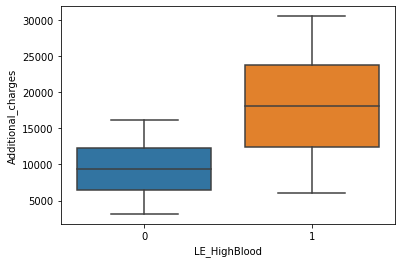

In [156]:
sns.boxplot(x='LE_HighBlood', y='Additional_charges', data=df_final)
plt.show()

In [157]:
#df_final['LE_HighBlood'].values.shape

In [158]:
#from scipy.stats import contingency
#stats.chisquare(np.concatenate((df_final['LE_HighBlood'].values.reshape(-1,1),
                                             #df_final['LE_Reflux_esophagitis'].values.reshape(-1,1)), axis=1), method='cramer')


In [159]:
#dir(contingency)

In [160]:
#from scipy.stats import chi2_contingency
#chi2_contingency(pd.crosstab(df_final['LE_HighBlood'], df_final['LE_Reflux_esophagitis']))[1]

In [161]:
for col1 in categorical_cols_final:
    for col2 in categorical_cols_final:
        if chi2_contingency(pd.crosstab(df_final[col1], df_final[col2]))[1] <= 0.05:
            print(f'{col1} vs. {col2}: ', chi2_contingency(pd.crosstab(df_final[col1], df_final[col2]))[1])

Area_Suburban vs. Area_Suburban:  0.0
Area_Suburban vs. Area_Urban:  0.0
Area_Suburban vs. Region_Southwest:  0.03813607164198197
Area_Suburban vs. LE_Asthma:  0.038184164523976966
Area_Urban vs. Area_Suburban:  0.0
Area_Urban vs. Area_Urban:  0.0
Area_Urban vs. Region_Puerto_Rico:  0.017733264570161427
Area_Urban vs. LE_Diabetes:  0.017429236727633808
Area_Urban vs. LE_Anxiety:  0.00765215001536312
Marital_Married vs. Marital_Married:  0.0
Marital_Married vs. Marital_Never Married:  3.489036130718033e-138
Marital_Married vs. Marital_Separated:  1.928497947021066e-138
Marital_Married vs. Marital_Widowed:  1.8583528670290723e-143
Marital_Married vs. Region_Great_Lakes:  0.03456490440043424
Marital_Married vs. LE_HighBlood:  0.017105946952771723
Marital_Married vs. LE_Arthritis:  0.03549383529048995
Marital_Married vs. LE_BackPain:  0.0002114827598797215
Marital_Never Married vs. Marital_Married:  3.489036130718033e-138
Marital_Never Married vs. Marital_Never Married:  0.0
Marital_Never 

Region_Western vs. Region_Great_Lakes:  2.434623313992562e-08
Region_Western vs. Region_Midwest:  1.4694276455113119e-12
Region_Western vs. Region_Northeast:  1.5327547171952717e-13
Region_Western vs. Region_ORV:  9.773024690295967e-06
Region_Western vs. Region_Southeast:  3.3724134053572046e-15
Region_Western vs. Region_Southwest:  6.966820224439234e-07
Region_Western vs. Region_West_Coast:  3.873083433319371e-06
Region_Western vs. Region_Western:  0.0
LE_ReAdmis vs. Services_CT Scan:  0.016047972117724473
LE_ReAdmis vs. Services_Intravenous:  0.04454849855441167
LE_ReAdmis vs. Region_Great_Lakes:  0.01115855690786951
LE_ReAdmis vs. Region_ORV:  0.038780836730084096
LE_ReAdmis vs. LE_ReAdmis:  0.0
LE_Soft_drink vs. Initial_admin_Emergency Admission:  0.02962423162299207
LE_Soft_drink vs. Initial_admin_Observation Admission:  0.022684639404774155
LE_Soft_drink vs. LE_Soft_drink:  0.0
LE_HighBlood vs. Marital_Married:  0.017105946952771723
LE_HighBlood vs. Region_Hawaii:  0.025197016156

In [162]:
#df_final.head()

In [163]:
#features1 = df_final.drop('LE_ReAdmis', axis=1)
#labels1 = df_final['LE_ReAdmis']

#selector1 = SelectKBest(k='all').fit(features1, labels1)

In [164]:
#selector1_score_df = pd.DataFrame(selector1.scores_, index=features1.columns, columns=['F-Score'])
#selector1_score_df

In [165]:
#plt.figure(figsize=(10,8))
#sns.barplot(x=selector1_score_df.index, y=selector1_score_df['F-Score'])
#plt.xticks(rotation=90)
#plt.set_xticks(selector1_score_df.index)
#plt.ylim([0,100])
#plt.show()

In [166]:
#selector1_pvalue_df = pd.DataFrame(selector1.pvalues_, index=features1.columns, columns=['P-Values'])
#selector1_pvalue_df

In [167]:
#low_p_selector1 = selector1_pvalue_df.loc[selector1_pvalue_df['P-Values'] <= 0.05]
#low_p_selector1

In [168]:
#selector2 = SelectKBest(chi2, k='all').fit(features1, labels1)

In [169]:
#selector2_score_df = pd.DataFrame(selector2.scores_, index=features1.columns, columns=['F-Score'])
#selector2_score_df

In [170]:
#plt.figure(figsize=(10,8))
#sns.barplot(x=selector2_score_df.index, y=selector2_score_df['F-Score'])
#plt.xticks(rotation=90)
#plt.ylim([0,100])
#plt.show()

In [171]:
#selector2_pvalue_df = pd.DataFrame(selector2.pvalues_, index=features1.columns, columns=['P-Values'])
#selector2_pvalue_df

In [172]:
#low_p_selector2 = selector2_pvalue_df.loc[selector2_pvalue_df['P-Values'] <= 0.05]
#low_p_selector2

In [173]:
#low_p_selector1

In [174]:
#features2 = features1.drop('TotalCharge', axis=1)
#labels2 = df_final['LE_ReAdmis']

#selector3 = SelectKBest(k='all').fit(features2, labels2)

In [175]:
#selector3_score_df = pd.DataFrame(selector3.scores_, index=features2.columns, columns=['F-Score'])
#selector3_score_df

In [176]:
#plt.figure(figsize=(10,8))
#sns.barplot(x=selector3_score_df.index, y=selector3_score_df['F-Score'])
#plt.xticks(rotation=90)
#plt.ylim([0,100])
#plt.show()

In [177]:
#selector3_pvalue_df = pd.DataFrame(selector3.pvalues_, index=features2.columns, columns=['P-Values'])
#selector3_pvalue_df

In [178]:
#low_p_selector3 = selector3_pvalue_df.loc[selector3_pvalue_df['P-Values'] <= 0.05]
#low_p_selector3

In [179]:
#df_final.columns

In [180]:
#discrete_identifier = np.empty_like(df_final.columns)
#discrete_identifier.shape

In [181]:
#non_discrete_cols = [col for col in df_final.columns if df_final[col].dtype=='float64']
#print(non_discrete_cols)

In [182]:
#df_final_cols_no_readmis = [col for col in df_final.columns if col != 'LE_ReAdmis']
#print(df_final_cols_no_readmis)

In [183]:
#discrete_id = np.zeros(len(df_final_cols_no_readmis))
#discrete_id

In [184]:
#df_final_cols_no_readmis.index('Income')

In [185]:
#for col in df_final_cols_no_readmis:
    #if col in non_discrete_cols:
        #discrete_id[df_final_cols_no_readmis.index(col)] = False
    #else:
        #discrete_id[df_final_cols_no_readmis.index(col)] = True
        
#discrete_id

In [186]:
#discrete_id_bool = discrete_id.astype(np.bool)

In [187]:
#discrete_id_bool

In [188]:
#features1 = df_final.drop('LE_ReAdmis', axis=1)
#labels1 = df_final['LE_ReAdmis']

#selector1 = mutual_info_classif(features1, labels1, discrete_features=discrete_id_bool)

In [189]:
#dir(selector1)

In [190]:
f_classif_cols = [col for col in df_final.columns if df_final[col].nunique() > 2]
print(f_classif_cols)

['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Complication_Ordinal']


In [191]:
chi2_cols = [col for col in df_final.columns if col not in f_classif_cols]
print(chi2_cols)

['LE_ReAdmis', 'LE_Soft_drink', 'LE_HighBlood', 'LE_Stroke', 'LE_Overweight', 'LE_Arthritis', 'LE_Diabetes', 'LE_Hyperlipidemia', 'LE_BackPain', 'LE_Anxiety', 'LE_Allergic_rhinitis', 'LE_Reflux_esophagitis', 'LE_Asthma', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI', 'Region_Great_Lakes', 'Region_Hawaii', 'Region_Midwest', 'Region_Northeast', 'Region_ORV', 'Region_Puerto_Rico', 'Region_Southeast', 'Region_Southwest', 'Region_West_Coast', 'Region_Western']


In [192]:
chi2_cols.remove('LE_ReAdmis')
print(chi2_cols)

['LE_Soft_drink', 'LE_HighBlood', 'LE_Stroke', 'LE_Overweight', 'LE_Arthritis', 'LE_Diabetes', 'LE_Hyperlipidemia', 'LE_BackPain', 'LE_Anxiety', 'LE_Allergic_rhinitis', 'LE_Reflux_esophagitis', 'LE_Asthma', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI', 'Region_Great_Lakes', 'Region_Hawaii', 'Region_Midwest', 'Region_Northeast', 'Region_ORV', 'Region_Puerto_Rico', 'Region_Southeast', 'Region_Southwest', 'Region_West_Coast', 'Region_Western']


In [193]:
f_classif_cols.remove('TotalCharge')
print(f_classif_cols)

['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Complication_Ordinal']


In [194]:
features1 = df_final[f_classif_cols]
labels1 = df_final['LE_ReAdmis']

selector1 = SelectKBest(k='all').fit(features1, labels1)

In [195]:
selector1_score_df = pd.DataFrame(selector1.scores_, index=features1.columns, columns=['F-Score'])
selector1_score_df

,F-Score
Population,4.016722
Children,5.539285
Age,2.499820
Income,1.323296
VitD_levels,0.166645
Doc_visits,0.000603
Full_meals_eaten,1.481466
vitD_supp,1.218424
Initial_days,26222.105595
Additional_charges,1.854971


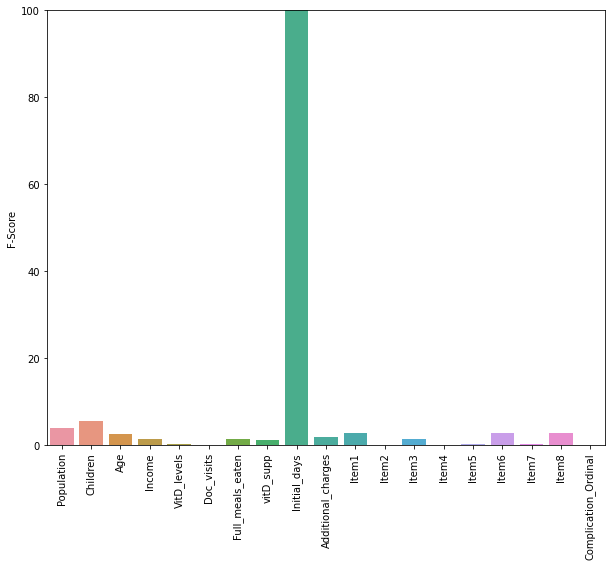

In [196]:
plt.figure(figsize=(10,8))
sns.barplot(x=selector1_score_df.index, y=selector1_score_df['F-Score'])
plt.xticks(rotation=90)
plt.ylim([0,100])
plt.show()

In [197]:
selector1_pvalue_df = pd.DataFrame(selector1.pvalues_, index=features1.columns, columns=['P-Value'])
selector1_pvalue_df

,P-Value
Population,0.045078
Children,0.018613
Age,0.113891
Income,0.250029
VitD_levels,0.683120
Doc_visits,0.980401
Full_meals_eaten,0.223574
vitD_supp,0.269697
Initial_days,0.000000
Additional_charges,0.173237


In [198]:
low_p_selector1 = selector1_pvalue_df.loc[selector1_pvalue_df['P-Value'] <= 0.05]
low_p_selector1

,P-Value
Population,0.045078
Children,0.018613
Initial_days,0.000000


In [199]:
features2 = df_final[chi2_cols]
labels2 = df_final['LE_ReAdmis']

selector2 = SelectKBest(chi2, k='all').fit(features2, labels2)

In [200]:
selector2_score_df = pd.DataFrame(selector2.scores_, index=features2.columns, columns=['F-Score'])
selector2_score_df

,F-Score
LE_Soft_drink,0.440528
LE_HighBlood,0.030455
LE_Stroke,0.006754
LE_Overweight,0.214229
LE_Arthritis,0.377348
LE_Diabetes,0.067915
LE_Hyperlipidemia,0.122946
LE_BackPain,1.043178
LE_Anxiety,0.039286
LE_Allergic_rhinitis,0.131048


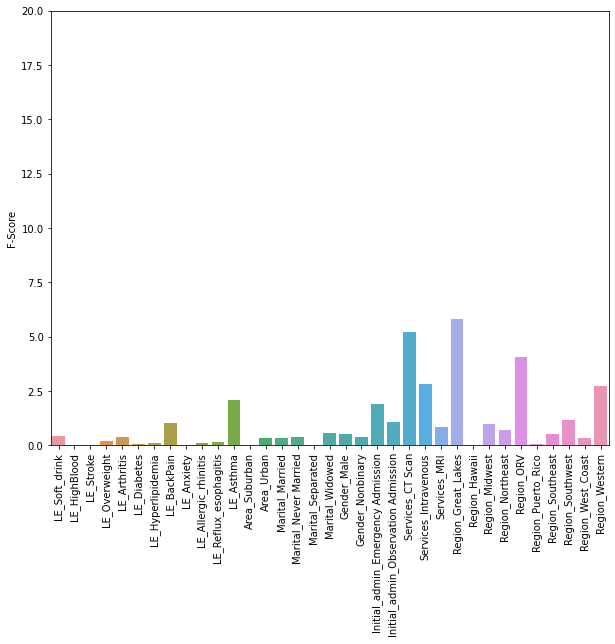

In [201]:
plt.figure(figsize=(10,8))
sns.barplot(x=selector2_score_df.index, y=selector2_score_df['F-Score'])
plt.xticks(rotation=90)
plt.ylim([0,20])
plt.show()

In [202]:
selector2_pvalue_df = pd.DataFrame(selector2.pvalues_, index=features2.columns, columns=['P-Value'])
selector2_pvalue_df

,P-Value
LE_Soft_drink,0.506868
LE_HighBlood,0.861462
LE_Stroke,0.934500
LE_Overweight,0.643473
LE_Arthritis,0.539026
LE_Diabetes,0.794397
LE_Hyperlipidemia,0.725861
LE_BackPain,0.307084
LE_Anxiety,0.842883
LE_Allergic_rhinitis,0.717347


In [203]:
low_p_selector2 = selector2_pvalue_df.loc[selector2_pvalue_df['P-Value'] <= 0.05]
low_p_selector2

,P-Value
Services_CT Scan,0.022303
Region_Great_Lakes,0.015904
Region_ORV,0.043508


In [204]:
final_cols = list(low_p_selector2.index) + list(low_p_selector1.index)
print(final_cols)

['Services_CT Scan', 'Region_Great_Lakes', 'Region_ORV', 'Population', 'Children', 'Initial_days']


In [205]:
final_cols.append('LE_ReAdmis')

In [206]:
df_reduced = df_final[final_cols]
df_reduced.head()

,Services_CT Scan,Region_Great_Lakes,Region_ORV,Population,Children,Initial_days,LE_ReAdmis
0,0,0,0,2951,1,10.585770,0
1,0,0,0,11303,3,15.129562,0
2,0,0,0,17125,3,4.772177,0
3,0,1,0,2162,0,1.714879,0
4,1,0,0,5287,1,1.254807,0


In [207]:
#df_reduced.shape

In [208]:
df_reduced['Population_Discretized'] = pd.cut(df_reduced['Population'], bins=10, labels=False)
#df_reduced.head()

<ipython-input-208-ab27ff10a579>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['Population_Discretized'] = pd.cut(df_reduced['Population'], bins=10, labels=False)


In [209]:
df_reduced['Children_Discretized'] = pd.cut(df_reduced['Children'], bins=5, labels=False)
#df_reduced.head()

<ipython-input-209-5435927dc5aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['Children_Discretized'] = pd.cut(df_reduced['Children'], bins=5, labels=False)


In [210]:
df_reduced['Initial_days_Discretized'] = pd.cut(df_reduced['Initial_days'], bins=10, labels=False)
#df_reduced.head()

<ipython-input-210-b2cdf46d2613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['Initial_days_Discretized'] = pd.cut(df_reduced['Initial_days'], bins=10, labels=False)


In [211]:
df_reduced = df_reduced.drop(columns=['Population', 'Children', 'Initial_days'], axis=1)
df_reduced.head()

,Services_CT Scan,Region_Great_Lakes,Region_ORV,LE_ReAdmis,Population_Discretized,Children_Discretized,Initial_days_Discretized
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1
2,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [212]:
X = df_reduced.drop('LE_ReAdmis', axis=1)
y = df_reduced['LE_ReAdmis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [213]:
acc_train = []
roc_train = []

k_fold_train = StratifiedKFold(n_splits=5)

for train_index, val_index in k_fold_train.split(X_train, y_train):
    train_X, train_y = X_train.iloc[train_index], y_train.iloc[train_index]
    val_X, val_y = X_train.iloc[val_index], y_train.iloc[val_index]
    
    model = MultinomialNB()
    
    model.fit(train_X, train_y)
    
    pred_class = model.predict(val_X)
    pred_probs = model.predict_proba(val_X)[:, 1]
    
    acc_train.append(accuracy_score(val_y, pred_class))
    roc_train.append(roc_auc_score(val_y, pred_probs))
    
    

In [214]:
acc_train

[0.799375, 0.79875, 0.81375, 0.79625, 0.795625]

In [215]:
roc_train

[0.8346419880564586,
 0.858986497508539,
 0.8570937270340765,
 0.8434281091971324,
 0.8584786195136144]

In [216]:
avg_acc_train = np.mean(acc_train)
avg_roc_auc_train = np.mean(roc_train)
print(avg_acc_train)
print(avg_roc_auc_train)

0.8007500000000001
0.8505257882619641


In [217]:
final_model = MultinomialNB()
final_model.fit(X_train, y_train)

preds_class_test = final_model.predict(X_test)
preds_probs_test = final_model.predict_proba(X_test)[:, 1]

accuracy_test = accuracy_score(y_test, preds_class_test)
roc_auc_test = roc_auc_score(y_test, preds_probs_test)

In [218]:
print(accuracy_test)

0.807


In [219]:
print(roc_auc_test)

0.8672280907920848


In [220]:
print(classification_report(y_test, preds_class_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1266
           1       0.70      0.82      0.76       734

    accuracy                           0.81      2000
   macro avg       0.79      0.81      0.80      2000
weighted avg       0.82      0.81      0.81      2000



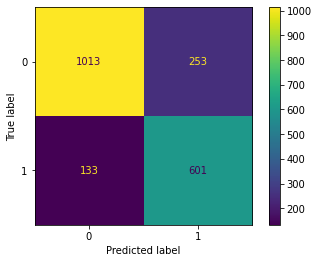

In [221]:
cm_final = confusion_matrix(y_test, preds_class_test, labels=final_model.classes_)

disp_final = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=final_model.classes_)

disp_final.plot()
plt.show()

<Figure size 720x576 with 0 Axes>

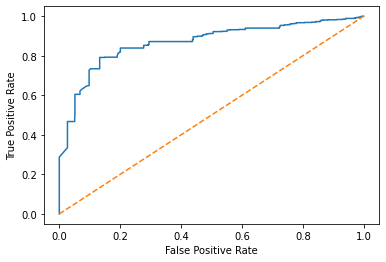

In [222]:
fpr, tpr, thresholds = roc_curve(y_test, preds_probs_test, pos_label=1)

X_no_skill = np.arange(0, 1.01, 0.01)
y_no_skill = np.arange(0, 1.01, 0.01)

plt.figure(figsize=(10,8))

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot(X_no_skill, y_no_skill, linestyle='--')

plt.show()

In [223]:
param_grid = {'alpha': [0.0, 0.5, 1.0, 1.5, 2.0], 'fit_prior': [True, False]}

grid_estimator = MultinomialNB()

grid = GridSearchCV(estimator=grid_estimator, param_grid=param_grid, scoring='accuracy', cv=5)

grid.fit(X, y)

print('Best Accuracy: ', grid.best_score_)
print('Best Hyperparameters: ', grid.best_params_)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alecclarkfeather/o

Best Accuracy:  0.7815000000000001
Best Hyperparameters:  {'alpha': 2.0, 'fit_prior': True}


In [224]:
#(1013 + 601) / 2000

0.807

In [225]:
#601 / (601+133)

0.8188010899182562

In [226]:
#1013 / (1013+253)

0.8001579778830964

In [228]:
#final_model.predict_proba(X_test)

array([[0.32263059, 0.67736941],
       [0.24506054, 0.75493946],
       [0.97301721, 0.02698279],
       ...,
       [0.5404671 , 0.4595329 ],
       [0.5404671 , 0.4595329 ],
       [0.60421328, 0.39578672]])

In [229]:
#df_reduced.head()

,Services_CT Scan,Region_Great_Lakes,Region_ORV,LE_ReAdmis,Population_Discretized,Children_Discretized,Initial_days_Discretized
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1
2,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [230]:
#X_train.head()

,Services_CT Scan,Region_Great_Lakes,Region_ORV,Population_Discretized,Children_Discretized,Initial_days_Discretized
8900,0,0,1,0,0,8
3937,0,0,0,0,3,1
8284,0,0,0,0,0,7
4616,0,0,0,1,0,2
5558,0,1,0,2,2,9


In [231]:
#X_test.head()

,Services_CT Scan,Region_Great_Lakes,Region_ORV,Population_Discretized,Children_Discretized,Initial_days_Discretized
6379,0,0,0,0,1,6
5824,0,0,0,0,1,7
3835,0,0,0,0,3,0
2965,0,0,0,1,0,1
9419,0,0,0,0,0,7


In [232]:
#y_train.head()

8900    1
3937    0
8284    1
4616    0
5558    1
Name: LE_ReAdmis, dtype: int64

In [233]:
#y_test.head()

6379    0
5824    1
3835    0
2965    0
9419    0
Name: LE_ReAdmis, dtype: int64

In [234]:
#df_reduced.to_csv('medical_reduced_clean.csv')

In [235]:
#X_train.to_csv('train_predictors.csv')

In [236]:
#X_test.to_csv('test_predictors.csv')

In [237]:
#y_train.to_csv('train_target.csv')

In [238]:
#y_test.to_csv('test_target.csv')

In [239]:
#check = pd.read_csv('train_target.csv')
#check

,Unnamed: 0,LE_ReAdmis
0,8900,1
1,3937,0
2,8284,1
3,4616,0
4,5558,1
...,...,...
7995,1441,0
7996,42,0
7997,1406,0
7998,9182,1
